In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
from tqdm import tqdm
import json
import time
import random

In [3]:
df=pd.read_csv(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\data.csv',dtype={'video_id': str})

In [4]:
for i in df['fps'] :
    if(i != 25):
        print(df['fps'])
df.head()

,gloss,video_id,xmin,ymin,xmax,ymax,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id
0,book,69241,385,37,885,720,25.0,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,book,65225,190,25,489,370,25.0,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,book,68011,262,1,652,480,25.0,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,book,68208,123,19,516,358,25.0,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,book,68012,95,0,1180,720,25.0,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [19]:
## size analysis

#video_data=[]
orignal_sizes=pd.DataFrame()
focus_sizes=pd.DataFrame()
path=r'video_data/videos'
for v_path in tqdm(os.listdir(path)):
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    #video=[]
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            try:
                frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
                gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                orignal_sizes=orignal_sizes.append(pd.DataFrame([gray.shape]))
                focus_sizes=focus_sizes.append(pd.DataFrame([gray_focus.shape]))
                break
            except:
                print(v_path)
                break
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #video_data.append(np.asarray(video))
    cap.release()
    cv2.destroyAllWindows()

 15%|█▍        | 2782/19070 [01:04<07:09, 37.93it/s]OpenCV: Couldn't read video stream from file "video_data/videos/.DS_Store"
[ERROR:0] global /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/videoio/src/cap.cpp (162) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): video_data/videos/.DS_Store in function 'icvExtractPattern'


 18%|█▊        | 3517/19070 [01:22<05:06, 50.74it/s]

video_data/videos/17086.mp4


 76%|███████▌  | 14467/19070 [05:38<02:07, 36.02it/s]

video_data/videos/51550.mp4


100%|██████████| 19070/19070 [07:24<00:00, 42.91it/s]


In [26]:
focus_sizes.describe()

,0,1
count,19067.000000,19067.000000
mean,282.748204,425.342581
std,128.128448,243.323445
min,7.000000,120.000000
25%,184.000000,240.000000
50%,259.000000,349.000000
75%,373.000000,480.000000
max,973.000000,1080.000000


In [27]:
orignal_sizes.describe()

,0,1
count,19067.000000,19067.000000
mean,455.137777,740.888446
std,255.907282,483.781224
min,120.000000,160.000000
25%,240.000000,320.000000
50%,370.000000,640.000000
75%,480.000000,720.000000
max,1080.000000,1920.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

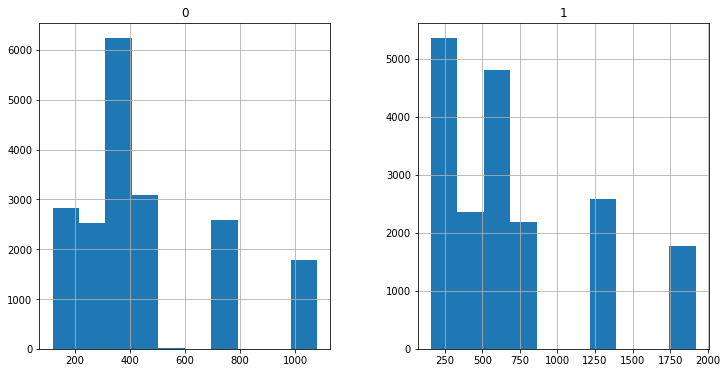

In [28]:
orignal_sizes.hist(figsize=(12,6),bins=10)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

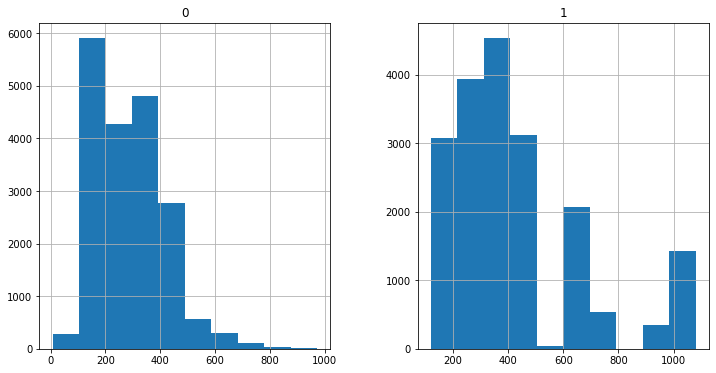

In [29]:
focus_sizes.hist(figsize=(12,6),bins=10)

In [30]:
orignal_sizes.head()

,0,1
0,240,320
0,480,640
0,320,480
0,192,288
0,240,320


In [31]:
orignal_sizes.mode()

,0,1
0,480,640


In [32]:
(orignal_sizes[0]==480).sum(),(orignal_sizes[1]==640).sum()

(2890, 3238)

In [33]:
focus_sizes.mode()

,0,1
0,320,240


In [34]:
(focus_sizes[0]==320).sum(),(focus_sizes[1]==240).sum()

(1584, 2474)

In [10]:

## checking fps

video_data=[]
video_data_focus=[]
fps=[]
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
for v_path in os.listdir(path)[:30]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    fps.append(cap.get(cv2.CAP_PROP_FPS))
    video=[]
    video_focus=[]
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
            gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            video.append(gray)
            video_focus.append(gray_focus)
            
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()


In [11]:
fps_data=pd.DataFrame()
fps_data['video_data_orignal']=video_data
fps_data['video_data_focus_orignal']=video_data_focus
#fps_data['tframes'] = tf
#fps_data['total_time'] = ttime
#fps_data['processedf'] = pf
   

In [13]:
## checking fps

video_data=[]
video_data_focus=[]
fps=[]
orignal_fps=[]
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
#tf = [], ttime = [], pf = []
for v_path in os.listdir(path)[:30]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    video=[]
    video_focus=[]
    
    
    ##Frame Pruning Code development
    num_breaks = 0
    ffppss = cap.get(cv2.CAP_PROP_FPS)
    orignal_fps.append(ffppss)
    tot_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    #tf.append(tot_frames)
    #ttime.append(tot_frames / ffppss)
    if(ffppss > 25):
        num_breaks = ffppss - 25
        num_breaks = int(num_breaks * tot_frames / ffppss)
    
    rand_frame = []
    for i in range(0, num_breaks):
        x = random.randint(1, tot_frames)
        while(x in rand_frame):
            x = random.randint(1, tot_frames)
        rand_frame.append(x)
    
    frame_num = 0
    processed_frames = 0
    
    while(cap.isOpened()):
        
        ret, frame = cap.read()
        if ret==True:
            
            ##Frame pruning in action
            frame_num = frame_num + 1
            if(frame_num in rand_frame):
                continue
            ##Frame pruning end
            cv2.imshow("frame",frame)
            processed_frames += 1
            frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
            gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            video.append(gray)
            video_focus.append(gray_focus)
            
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #pf.append(processed_frames)
    fps.append(int(ffppss * processed_frames / tot_frames))
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()

In [7]:
#fps_data=pd.DataFrame()
fps_data['video_data']=video_data
fps_data['fps']=fps
fps_data['orignal_fps']=orignal_fps
fps_data['video_data_focus']=video_data_focus
#fps_data['tframes'] = tf
#fps_data['total_time'] = ttime
#fps_data['processedf'] = pf
   

In [12]:
fps_data

,video_data,fps,orignal_fps,video_data_focus,video_data_orignal,video_data_focus_orignal
0,"(23, 320, 480)",25,25.000000,"(23, 320, 240)","(23, 320, 480)","(23, 320, 240)"
1,"(60, 320, 480)",25,25.000000,"(60, 320, 240)","(60, 320, 480)","(60, 320, 240)"
2,"(58, 240, 320)",25,25.000000,"(58, 183, 235)","(58, 240, 320)","(58, 183, 235)"
3,"(55, 480, 640)",25,30.004616,"(55, 377, 480)","(65, 480, 640)","(65, 377, 480)"
4,"(24, 240, 320)",25,29.970000,"(24, 174, 225)","(28, 240, 320)","(28, 174, 225)"
5,"(60, 192, 288)",24,29.970000,"(60, 124, 178)","(71, 192, 288)","(71, 124, 178)"
6,"(51, 192, 288)",25,29.970000,"(51, 132, 179)","(60, 192, 288)","(60, 132, 179)"
7,"(70, 400, 720)",25,30.331450,"(70, 210, 354)","(84, 400, 720)","(84, 210, 354)"
8,"(60, 320, 480)",25,25.000000,"(60, 320, 240)","(60, 320, 480)","(60, 320, 240)"
9,"(56, 240, 320)",25,25.000000,"(56, 179, 235)","(56, 240, 320)","(56, 179, 235)"


In [141]:
"""
##NOT_WORKING

## checking fps with adjusted data
import time
video_data=[]
video_data_focus=[]
path=r'video_data/videos'
for v_path in os.listdir(path)[:30]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    video=[]
    video_focus=[]
    prev_time= 0 
    flag=True
    while(cap.isOpened()):
        time_elapsed = time.time() - prev_time
        
        ret, frame = cap.read()
        if time_elapsed >= 1/25:# or flag:
            if ret==True:
                prev_time=time.time()
                frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
                gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                video.append(gray)
                video_focus.append(gray_focus)
                cv2.imshow('gray',gray_focus)
                flag=False
            else:
                break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()
"""

In [ ]:
"""

##With Not_working
fps_data['video_data_adjusted']=video_data
fps_data['video_data_focus_adjusted']=video_data_focus

fps_data
"""

In [ ]:
"""
## checking fps
import time
video_data=[]
video_data_focus=[]
path=r'video_data/videos'
x = []
for v_path in os.listdir(path)[2:10]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    cap.set(cv2.CAP_PROP_FPS,25) 
    video=[]
    video_focus=[]
    prev_time=time.time()
    flag=True
    x.append(cap.get(cv2.CAP_PROP_FPS))
    while(cap.isOpened()):
        ret, frame = cap.read()
        
        
        if ret==True:
            frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
            gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            video.append(gray)
            video_focus.append(gray_focus)
            cv2.imshow('gray',gray_focus)
            flag=False
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()
print(x)
"""